In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
Auto = pd.read_csv('auto-mpg.csv')
df=Auto.copy()
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [3]:
print(df.shape)
df.info()

(398, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


## Pre-preocessing

In [4]:
print(len(set(df['car name'])))
print(df['car name'].value_counts())

305
ford pinto                         6
ford maverick                      5
toyota corolla                     5
amc matador                        5
chevrolet chevette                 4
                                  ..
plymouth satellite custom (sw)     1
buick skylark 320                  1
buick regal sport coupe (turbo)    1
bmw 2002                           1
mercedes benz 300d                 1
Name: car name, Length: 305, dtype: int64


In [5]:
df=df.drop(['car name'],axis=1)

In [6]:
df.isnull().sum(axis = 0)

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [7]:
df['horsepower']=pd.to_numeric(df['horsepower'], errors='coerce') #convert string to numeric if not possible change to Nan
df=df[df['horsepower'].notnull()]

In [8]:
print(df.shape)
df.head()

(392, 8)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1


In [9]:
features=list(df.iloc[:,1:].columns)
X=df.iloc[:,1:].values
y=df.iloc[:,0].values
print(y.shape,X.shape,features)

(392,) (392, 7) ['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin']


In [10]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


<AxesSubplot:>

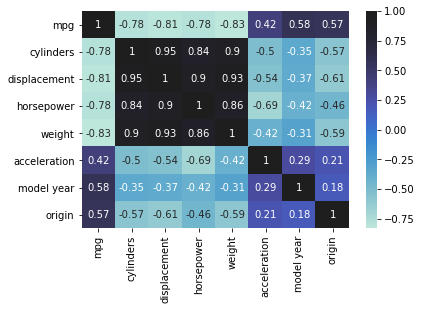

In [11]:
sns.heatmap(df.corr(),center=True,annot=True)

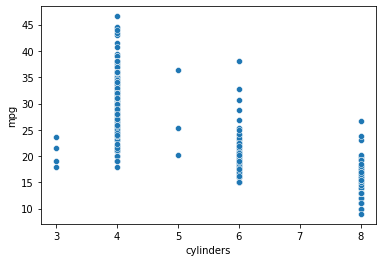

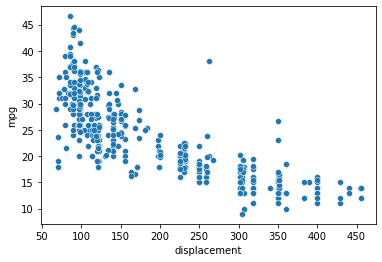

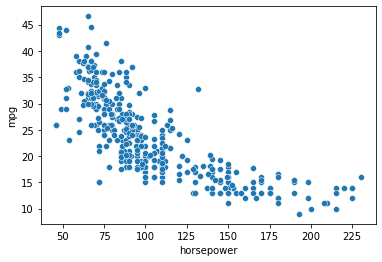

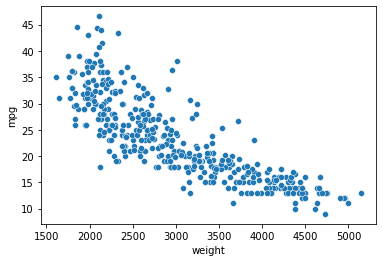

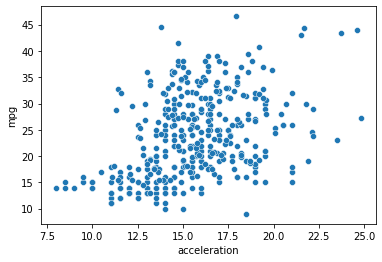

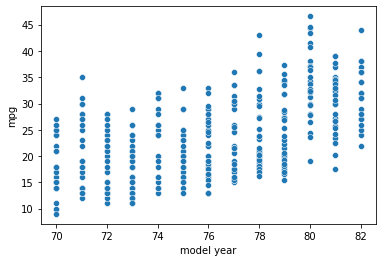

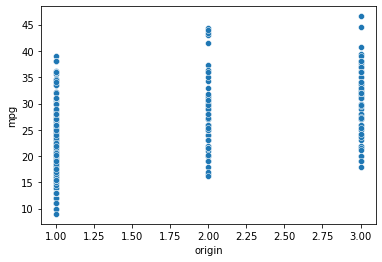

In [12]:
#sns.histplot(df['mpg'])
for i in features:
    sns.scatterplot(data=df, x=i, y='mpg')
    plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=0)
print(X.shape,X_train.shape, X_test.shape)

(392, 7) (313, 7) (79, 7)


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(X_train.max(),X_train.min())
print(X_test.max(),X_test.min())

1.0 0.0
1.0 0.0


## Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
Reg=LinearRegression()
Reg.fit(X_train,y_train)
#----------------------------------------------------#
Wo=Reg.intercept_
Wn=Reg.coef_
print(Wo)
W=list(zip(features,Reg.coef_))
print(W)
#----------------------------------------------------#
y_pred_train=Reg.predict(X_train)
y_pred_test=Reg.predict(X_test)
#----------------------------------------------------#
from sklearn.metrics import r2_score
r2_train=r2_score(y_pred_train,y_train)
r2_test=r2_score(y_pred_test,y_test)
#----------------------------------------------------#
print(r2_train,r2_test)

25.855394160103923
[('cylinders', -1.9517326984540488), ('displacement', 6.74775219351446), ('horsepower', -1.8893792977569548), ('weight', -23.9409820459996), ('acceleration', 2.3751685981590307), ('model year', 8.896076114491896), ('origin', 2.256586670778625)]
0.7752689672981333 0.8076758326210308


## Linear Regressiob with poly

In [16]:
from sklearn.preprocessing import PolynomialFeatures
Reg_poly=PolynomialFeatures(degree=2)
X_poly = Reg_poly.fit_transform(X_train)
Reg.fit(X_poly, y_train)
#--------------------------------------------------------#
Wo_poly=Reg.intercept_
Wn_poly=Reg.coef_
print(Wo_poly)
W_poly=list(zip(features,Reg.coef_))
print(W_poly)
#--------------------------------------------------------#
y2_pred_test=Reg.predict(Reg_poly.fit_transform(X_test))
y2_pred_train=Reg.predict(X_poly)
#---------------------------------------------------------#
r2_train_poly=r2_score(y_train,y2_pred_train)
r2_test_poly=r2_score(y_test,y2_pred_test)
#---------------------------------------------------------#
print(r2_train_poly,r2_test_poly)

43.975861349394805
[('cylinders', -1.4438377979375208e-14), ('displacement', -1.5702326748655406), ('horsepower', -33.47176363961474), ('weight', -8.663297359867554), ('acceleration', -19.072150876510072), ('model year', -26.581953496948547), ('origin', -4.5332245406715455)]
0.8940467032916688 0.8901788877237821


In [32]:
len(pd.DataFrame(Wn_poly))

36

In [17]:
a=pd.DataFrame(W,columns=['feature','coefficient'])
b=pd.DataFrame(W_poly,columns=['feature','coefficient_poly'])
a['coefficient_poly']=b['coefficient_poly']
a

,feature,coefficient,coefficient_poly
0,cylinders,-1.951733,-1.443838e-14
1,displacement,6.747752,-1.570233e+00
2,horsepower,-1.889379,-3.347176e+01
3,weight,-23.940982,-8.663297e+00
4,acceleration,2.375169,-1.907215e+01
5,model year,8.896076,-2.658195e+01
6,origin,2.256587,-4.533225e+00


## Regressors function

In [18]:
def Regressor_1(X_train,y_train,X_test,y_test):
    from sklearn.linear_model import LinearRegression
    Reg=LinearRegression()
    Reg.fit(X_train,y_train)
    #----------------------------------------------------#
    Wo=Reg.intercept_
    Wn=Reg.coef_
    #print(Wo)
    W=list(zip(features,Reg.coef_))
    df_cof1=pd.DataFrame(W,columns=['features','coefficient'])
    #print(W)
    #----------------------------------------------------#
    y_pred_train=Reg.predict(X_train)
    y_pred_test=Reg.predict(X_test)
    #----------------------------------------------------#
    from sklearn.metrics import r2_score
    r2_train=r2_score(y_pred_train,y_train)
    r2_test=r2_score(y_pred_test,y_test)
    #----------------------------------------------------#
    return(r2_train,r2_test,df_cof1)

In [19]:
Regressor_1(X_train,y_train,X_test,y_test)

(0.7752689672981333,
 0.8076758326210308,
        features  coefficient
 0     cylinders    -1.951733
 1  displacement     6.747752
 2    horsepower    -1.889379
 3        weight   -23.940982
 4  acceleration     2.375169
 5    model year     8.896076
 6        origin     2.256587)

In [20]:
def Regressor_2 (X_train,y_train,X_test,y_test,n):
    #import libraries
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import r2_score
    #linear model
    Reg_lin=LinearRegression()
    Reg_lin.fit(X_train,y_train)
    y_pred=Reg_lin.predict(X_test)
    R2_lin=r2_score(y_pred , y_test)
    #poly
    R2_test=[]
    pol=(1,R2_lin)
    Deg=[i for i in range(2,n)]
    #
    #print(pol)
    for i in Deg:
        poly_reg=PolynomialFeatures(degree=i)
        X_poly=poly_reg.fit_transform(X_train)
        #
        lin_reg2=LinearRegression()
        lin_reg2.fit(X_poly,y_train)
        #
        y_pred_test=lin_reg2.predict(poly_reg.fit_transform(X_test))
        #
        r2_test=r2_score(y_test,y_pred_test)
        #
        R2_test.append(r2_test)
        if r2_test>= R2_lin:
            pol=(i,r2_test)
        else:
            pol=pol
            break
        #
        k=list(zip(Deg, R2_test))
        #--------------------------------------------------------#
    Wo_poly=Reg.intercept_
    Wn_poly=Reg.coef_
    #print(Wo_poly)
    W_poly=list(zip(features,Reg.coef_))
    #print(W_poly)
    #--------------------------------------------------------#
    df_cof1=pd.DataFrame(W_poly,columns=['features','coefficient_poly'])
    return (pol,df_cof1)

In [21]:
Regressor_2 (X_train,y_train,X_test,y_test,5)

((2, 0.8901788877237821),
        features  coefficient_poly
 0     cylinders     -1.443838e-14
 1  displacement     -1.570233e+00
 2    horsepower     -3.347176e+01
 3        weight     -8.663297e+00
 4  acceleration     -1.907215e+01
 5    model year     -2.658195e+01
 6        origin     -4.533225e+00)

In [22]:
def Regressor_3 (X_train,y_train,X_test,y_test,n):
    Ridge_M=[]
    Lasso_M=[]
    a= list(np.arange(0.001,20,0.1))
    for alpha in a: #alpha range
        poly_reg=PolynomialFeatures(degree=n)
        X_poly=poly_reg.fit_transform(X_train)
        #------------------------------------------#
        from sklearn.linear_model import Ridge, Lasso
        #------------------------------------------#
        ridge= Ridge(alpha=alpha, normalize=True)
        ridge.fit(poly_reg.fit_transform(X_train),y_train)
        y_pred=ridge.predict(poly_reg.fit_transform(X_test))
        R2_ridge=r2_score(y_pred,y_test)
        Ridge_M.append(R2_ridge)
        #------------------------------------------#
        lasso= Lasso(alpha=alpha, normalize=True)
        lasso.fit(poly_reg.fit_transform(X_train),y_train)
        y_pred=lasso.predict(poly_reg.fit_transform(X_test))
        R2_lasso=r2_score(y_pred,y_test)
        Lasso_M.append(R2_lasso)
        #------------------------------------------#
    A_ridge=list(zip(a,Ridge_M))
    A_lasso=list(zip(a,Lasso_M))
    R=max(A_ridge, key=lambda x:x[1])
    L=max(A_lasso, key=lambda x:x[1])
        #------------------------------------------#
    return(R,L)

In [23]:
Regressor_3 (X_train,y_train,X_test,y_test,5)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5.255540965526052, tolerance: 1.890665335463259
  model = cd_fast.enet_coordinate_descent(


((0.101, 0.8795963609077041), (0.001, 0.8868039159196793))

In [24]:
def Regressor_3 (X_train,y_train,X_test,y_test,n):
    Ridge_M=[]
    a= list(np.arange(0.001,20,0.1))
    for alpha in a: #alpha range
        poly_reg=PolynomialFeatures(degree=n)
        X_poly=poly_reg.fit_transform(X_train)
        #------------------------------------------#
        from sklearn.linear_model import Ridge, Lasso
        #------------------------------------------#
        ridge= Ridge(alpha=alpha, normalize=True)
        ridge.fit(poly_reg.fit_transform(X_train),y_train)
        y_pred=ridge.predict(poly_reg.fit_transform(X_test))
        R2_ridge=r2_score(y_pred,y_test)
        Ridge_M.append(R2_ridge)
        #------------------------------------------#
    A_ridge=list(zip(a,Ridge_M))
    R=max(A_ridge, key=lambda x:x[1])
    ridge= Ridge(alpha=R[0], normalize=True)
    ridge.fit(poly_reg.fit_transform(X_train),y_train)
    W_ridge=list(zip(features,ridge.coef_))
    df_cof3=pd.DataFrame(W_ridge,columns=['features','coefficient_ridge'])
        #------------------------------------------#
    return(R,df_cof3)

In [25]:
Regressor_3 (X_train,y_train,X_test,y_test,3)

((0.101, 0.877776991807988),
        features  coefficient_ridge
 0     cylinders           0.000000
 1  displacement          -2.096027
 2    horsepower          -3.263433
 3        weight          -2.584869
 4  acceleration          -4.592522
 5    model year          -1.040575
 6        origin           2.616731)

In [26]:
def Regressor_4 (X_train,y_train,X_test,y_test,n):
    Lasso_M=[]
    a= list(np.arange(0.001,20,0.1))
    for alpha in a: #alpha range
        poly_reg=PolynomialFeatures(degree=n)
        X_poly=poly_reg.fit_transform(X_train)
        #------------------------------------------#
        from sklearn.linear_model import Ridge, Lasso
        #------------------------------------------#
        lasso= Lasso(alpha=alpha, normalize=True)
        lasso.fit(poly_reg.fit_transform(X_train),y_train)
        y_pred=lasso.predict(poly_reg.fit_transform(X_test))
        R2_lasso=r2_score(y_pred,y_test)
        Lasso_M.append(R2_lasso)
        #------------------------------------------#
    A_lasso=list(zip(a,Lasso_M))
    L=max(A_lasso, key=lambda x:x[1])
    lasso= Lasso(alpha=L[0], normalize=True)
    lasso.fit(poly_reg.fit_transform(X_train),y_train)
    W_lasso=list(zip(features,lasso.coef_))
    df_cof4=pd.DataFrame(W_lasso,columns=['features','coefficient_lasso'])
        #------------------------------------------#
    return(L,df_cof4)

In [27]:
Regressor_4 (X_train,y_train,X_test,y_test,3)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.161744739115875, tolerance: 1.890665335463259
  model = cd_fast.enet_coordinate_descent(
C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.161744739115875, tolerance: 1.890665335463259
  model = cd_fast.enet_coordinate_descent(


((0.001, 0.8778028218283971),
        features  coefficient_lasso
 0     cylinders           0.000000
 1  displacement          -3.753157
 2    horsepower          -3.724148
 3        weight          -0.000000
 4  acceleration         -18.506547
 5    model year          -0.000000
 6        origin           0.773823)

In [28]:
def Regressors(X_train,y_train,X_test,y_test,features,n):
    S1=Regressor_1(X_train,y_train,X_test,y_test)
    S2=Regressor_2 (X_train,y_train,X_test,y_test,n)
    S3=Regressor_3 (X_train,y_train,X_test,y_test,n)
    S4=Regressor_4 (X_train,y_train,X_test,y_test,n)
    
    Reg_M=['linear','liner with poly degree','Ridge','Lasso']
    S=[S1,S2,S3,S4]
    S_score=[S1[1],S2[0][1],S3[0][1],S4[0][1]]
    j=S_score.index(max(S_score))
    z=list(zip(Reg_M,S_score))
    print(z)
    return(Reg_M[j],S[j])

In [29]:
Regressors(X_train,y_train,X_test,y_test,features,3)

C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.161744739115875, tolerance: 1.890665335463259
  model = cd_fast.enet_coordinate_descent(


[('linear', 0.8076758326210308), ('liner with poly degree', 0.8901788877237821), ('Ridge', 0.877776991807988), ('Lasso', 0.8778028218283971)]


C:\Users\dell\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 7.161744739115875, tolerance: 1.890665335463259
  model = cd_fast.enet_coordinate_descent(


('liner with poly degree',
 ((2, 0.8901788877237821),
         features  coefficient_poly
  0     cylinders     -1.443838e-14
  1  displacement     -1.570233e+00
  2    horsepower     -3.347176e+01
  3        weight     -8.663297e+00
  4  acceleration     -1.907215e+01
  5    model year     -2.658195e+01
  6        origin     -4.533225e+00))